In [9]:
import numpy as np
import scipy as sp
from scipy import interpolate
import matplotlib.pyplot as plt
import math
import functools

## Zadanie 1

In [16]:
def lagrange(arguments: [], values: []):
    M = len(arguments)
    assert M != 0 and M == len(values)
    def result(x: float) -> float:
        p = 0
        for j in range(M):
            fac = functools.reduce(lambda x,y: x*y, [((x-arguments[k])/(arguments[j]-arguments[k])) for k in range(M) if k != j], 1)
            p += values[j]*fac
        return p
    return result

## Zadanie 2


In [83]:
def f(x: float) -> float:
    return 1/(25*x**2+1)

def cheby(a: float, b: float, n: int) -> []:
    return [(a+b)/2 + ((b-a)/2 * math.cos((2*k-1)/(2*n) * math.pi)) for k in range(1, n+1)]

ideal_func = np.linspace(-2,2,4000)
ideal_val = [f(x) for x in ideal_func]

x1 = np.linspace(-2, 2, 21) #równo odległe
values1 = [f(x) for x in x1]

x2 = cheby(-2, 2, 21) #węzły chebysheva
values2 = [f(x) for x in x2]

ideal_func2 = np.linspace(x2[len(x2)-1], x2[0], 4000) #dla interpolacji f. sklejanymi

lagrange1 = interpolate.lagrange(x1, values1) #interpolacja Lagranga dla węzłów równoodległych
lagrange2 = interpolate.lagrange(x2, values2) #interpolacja Lagranga dla węzłów Chebysheva

spline1 = interpolate.interp1d(x1, values1, kind='cubic') 
spline2 = interpolate.interp1d(x2, values2, kind='cubic')


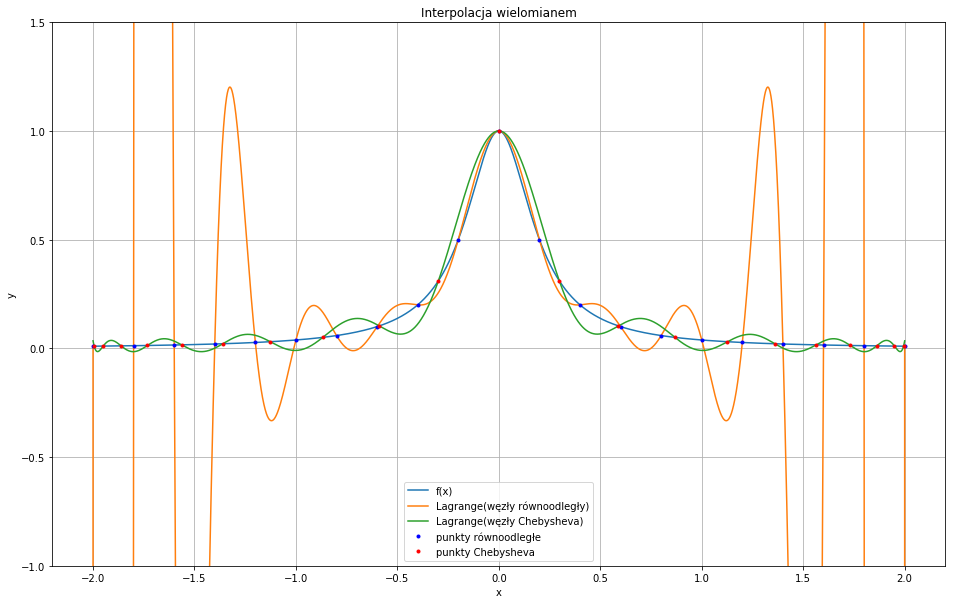

In [18]:
plt.figure(figsize=(16, 10))
plt.ylim(-1, 1.5)
plt.plot(ideal_func, f(ideal_func), label="f(x)")
plt.plot(ideal_func, lagrange1(ideal_func), label="Lagrange(węzły równoodległy)")
plt.plot(ideal_func, lagrange2(ideal_func), label="Lagrange(węzły Chebysheva)")
plt.plot(x1, values1, 'b.', label="punkty równoodległe")
plt.plot(x2, values2, 'r.', label="punkty Chebysheva")
plt.legend()
plt.title("Interpolacja wielomianem")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


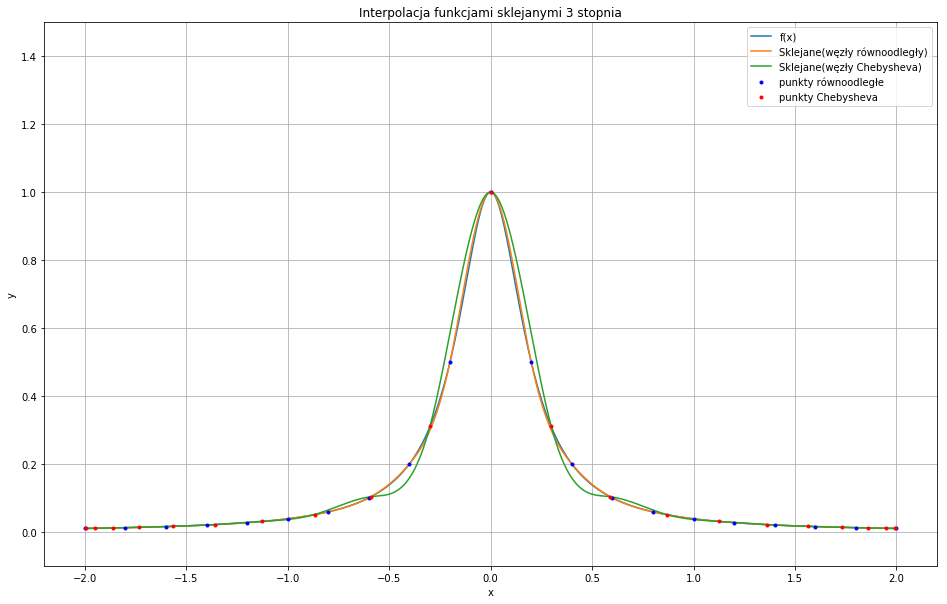

In [19]:
plt.figure(figsize=(16, 10))
plt.ylim(-0.1, 1.5)
plt.plot(ideal_func, f(ideal_func), label="f(x)")
plt.plot(ideal_func, spline1(ideal_func), label="Sklejane(węzły równoodległy)")
plt.plot(ideal_func, spline2(ideal_func2), label="Sklejane(węzły Chebysheva)")
plt.plot(x1, values1, 'b.', label="punkty równoodległe")
plt.plot(x2, values2, 'r.', label="punkty Chebysheva")
plt.legend()
plt.title("Interpolacja funkcjami sklejanymi 3 stopnia")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Zauważamy, że dla interpolacji Lagrange'a użycie węzłów Chebysheva znacznie poprawia dokładność przybliżenia funkcji. Związane jest to z efektem Rungego występującym przy interpolacji wielomianami wysokiego stopnia, gdzie, szczególnie na krańcach przedziału, wykres znacznie odbiega od rzeczywistego przebiegu funkcji. Użycie większej ilości węzłów bliżej krańców przedziałów redukuje ten efekt.

Natomiast dla interpolacji funkcjacmi sklejanymi użycie węzłów równoodległych dało lepsze rezultaty.

## Zadanie 3

Text(0,0.5,'prędkość obrotowa [1000 RPM]')

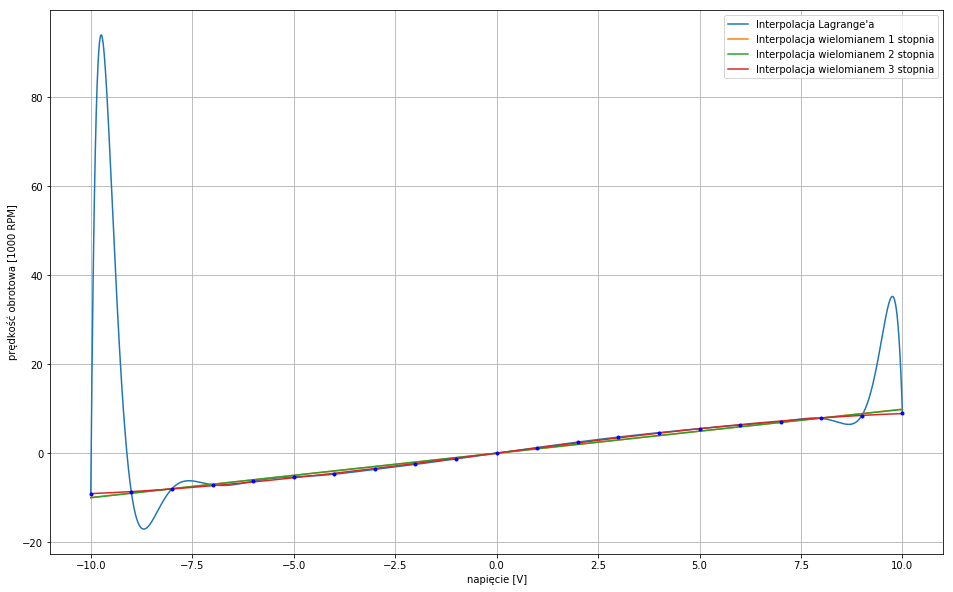

In [31]:
x = np.linspace(-10,10, 21)
y = [-9.10, -8.82, -7.99, -7.10, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 0, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.10, 7.81, 8.45, 9.02]

f0 = interpolate.lagrange(x, y)
f1 = np.poly1d(np.polyfit(x, y, 1))
f2 = np.poly1d(np.polyfit(x, y, 2))
f3 = np.poly1d(np.polyfit(x, y, 3))

ideal_func = np.linspace(-10, 10, 20000)

plt.figure(figsize=(16, 10))
plt.plot(ideal_func, f0(ideal_func), label="Interpolacja Lagrange'a")
plt.plot(ideal_func, f1(ideal_func), label="Interpolacja wielomianem 1 stopnia")
plt.plot(ideal_func, f2(ideal_func), label="Interpolacja wielomianem 2 stopnia")
plt.plot(ideal_func, f3(ideal_func), label="Interpolacja wielomianem 3 stopnia")
plt.plot(x, y, 'b.')
plt.legend()
plt.grid()
plt.xlabel("napięcie [V]")
plt.ylabel("prędkość obrotowa [1000 RPM]")

W przedzałach <-10;-7>, <8;10> przy interpolacji wielomianowej możemy zaobserwować efekt Rungego, który zaburza otrzymane przez interpolacje przybliżenie rzeczywistej funkcji. Interpolacja wielomianami niskiego stopnia daje podobne do siebie rezultaty. Wielomiany 1 i 2 stopnia w zasadzie się pokrywają, jednak nie przechodzą przez wszystkie dane punkty tak jak wielomian 3 stopnia.

## Zadanie 4

In [73]:
time = [0., 1., 2., 3.]
position = [0., 42.7, 73.2, 92.5]

f0 = interpolate.lagrange(time, position)
f0_inverse = interpolate.lagrange(position, time)

tx = f0_inverse(79.6)
vx = (f0(tx+0.001)-f0(tx))/0.001
print(f"Kierowca minął fotoradar po {tx:.3}s z prędkością {vx*3.6:.4}km/h")

Kierowca minął fotoradar po 2.29s z prędkością 77.41km/h
